<a href="https://colab.research.google.com/github/Ironsoldier353/QVI_analysis/blob/main/QVI_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import pandas as pd

customer_data = pd.read_csv('QVI_purchase_behaviour.csv')
transaction_data = pd.read_excel('QVI_transaction_data.xlsx')


In [99]:
# Convert DATE from integer to datetime
transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'], origin='1899-12-30', unit='D')


In [100]:
# Extract pack size (assumes pack size is mentioned in 'g')
transaction_data['PACK_SIZE'] = transaction_data['PROD_NAME'].str.extract(r'(\d+g)')[0].str.replace('g', '').astype(float)

# Extract brand name (assuming the brand is the first word in PROD_NAME)
transaction_data['BRAND'] = transaction_data['PROD_NAME'].str.split().str[0]


In [85]:
# Merge transaction data with customer data
merged_data = pd.merge(transaction_data, customer_data, on='LYLTY_CARD_NBR')


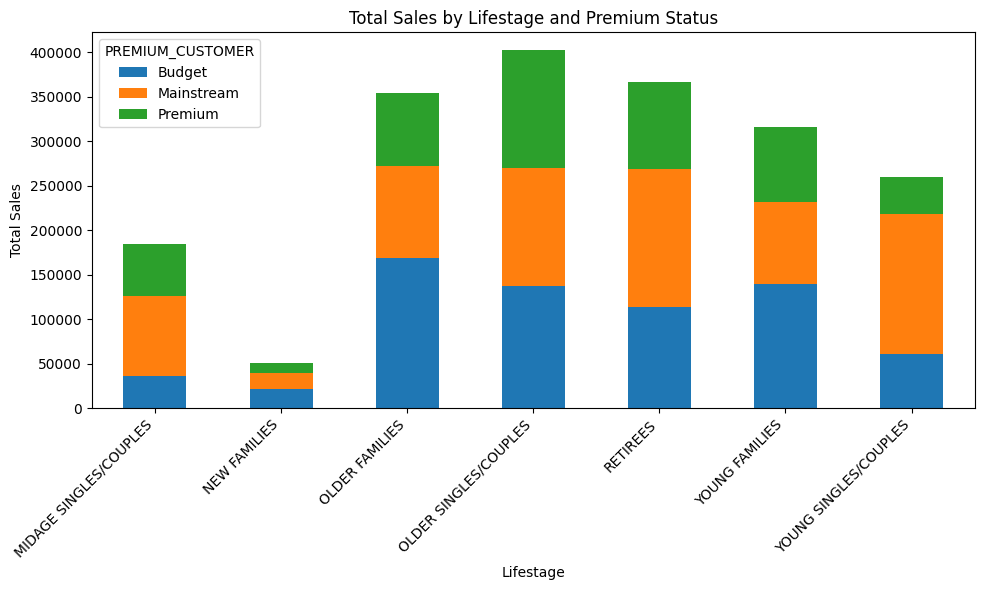

In [86]:
import matplotlib.pyplot as plt

# Group by LIFESTAGE and PREMIUM_CUSTOMER and sum TOT_SALES
sales_by_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().unstack()

# Plot total sales by segment
ax = sales_by_segment.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the title and labels
plt.title('Total Sales by Lifestage and Premium Status')
plt.xlabel('Lifestage')
plt.ylabel('Total Sales')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # ha='right' aligns text to the right

# Adjust layout to ensure labels fit into the plot
plt.tight_layout()

# Save the plot to a file
plt.savefig('/content/total_sales_by_lifestage_and_premium_status.png')

# Show the plot
plt.show()


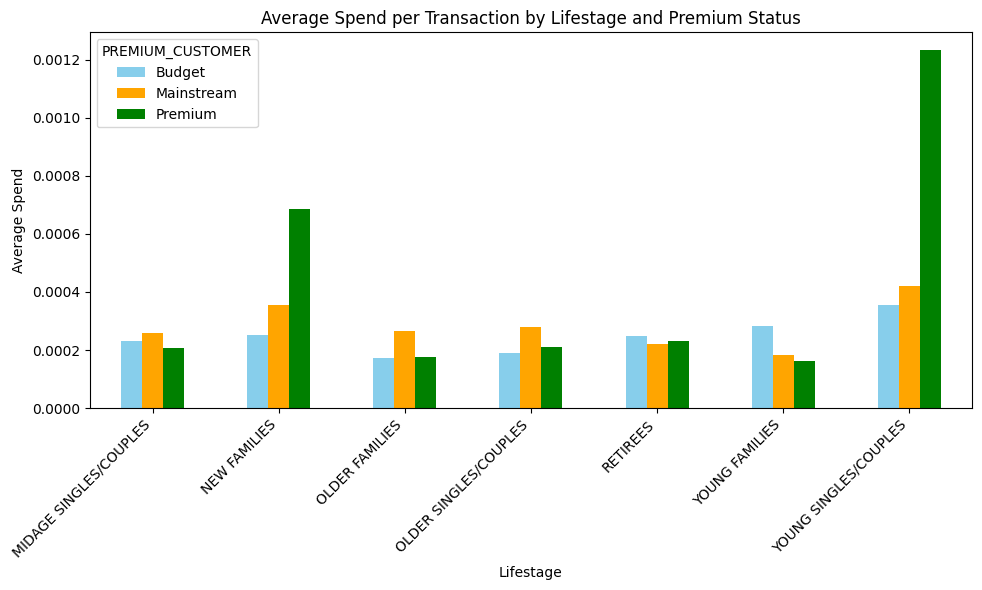

In [87]:
# Calculate average spend per transaction
merged_data['AVG_SPEND_PER_TXN'] = merged_data['TOT_SALES'] / merged_data['TXN_ID']

# Group by LIFESTAGE and PREMIUM_CUSTOMER and calculate average spend
avg_spend_by_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['AVG_SPEND_PER_TXN'].mean().unstack()

# Plot average spend by segment
ax = avg_spend_by_segment.plot(kind='bar', color=['skyblue', 'orange', 'green'], figsize=(10, 6))

# Set the title and labels
plt.title('Average Spend per Transaction by Lifestage and Premium Status')
plt.xlabel('Lifestage')
plt.ylabel('Average Spend')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # ha='right' aligns text to the right

# Adjust layout to ensure labels fit into the plot
plt.tight_layout()

# Save the plot to a file
plt.savefig('/content/average_spend_per_transaction_by_lifestage_and_premium_status.png')

# Show the plot
plt.show()


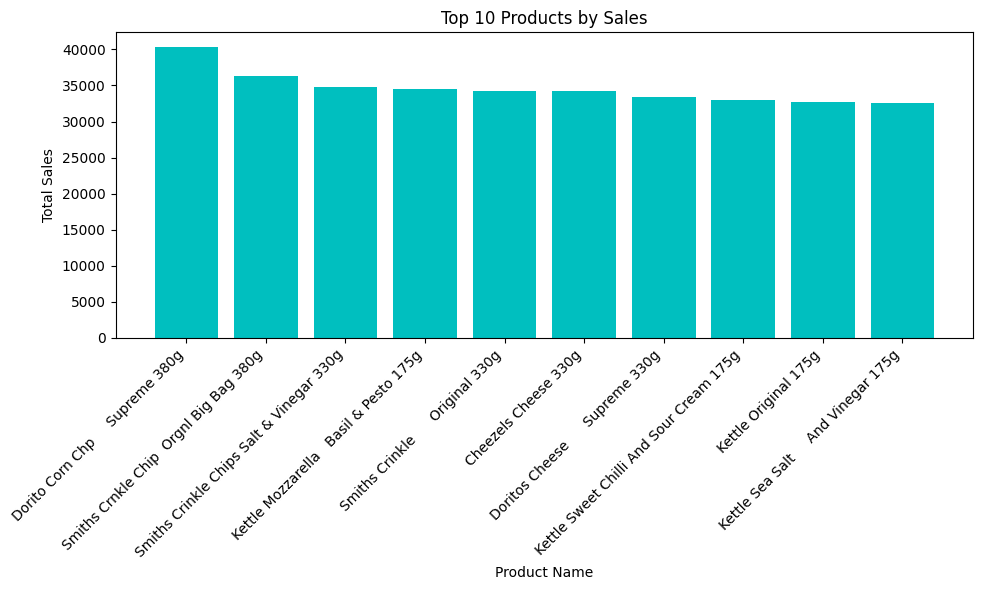

In [88]:
# Group by PROD_NAME and sum TOT_SALES
top_products = merged_data.groupby('PROD_NAME')['TOT_SALES'].sum().sort_values(ascending=False).head(10)

# Plot top products by sales
fig, ax = plt.subplots(figsize=(10,6))
bars = ax.bar(top_products.index, top_products.values, color='c')

# Set the title and labels
plt.title('Top 10 Products by Sales')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Align labels directly under bars
ax.set_xticks(range(len(top_products.index)))
ax.set_xticklabels(top_products.index, rotation=45, ha='right')

# Adjust layout to ensure labels fit into the plot
plt.tight_layout()

# Save the plot to a file
plt.savefig('/content/top_10_products_by_sales.png')

# Show the plot
plt.show()


In [89]:
# Group by LIFESTAGE, PREMIUM_CUSTOMER, and PROD_NAME and sum PROD_QTY
segment_product_pref = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER', 'PROD_NAME'])['PROD_QTY'].sum().unstack()



In [90]:
# Unique values in LIFESTAGE and PREMIUM_CUSTOMER
print(data['LIFESTAGE'].unique())
print(data['PREMIUM_CUSTOMER'].unique())


['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES']
['Premium' 'Mainstream' 'Budget']


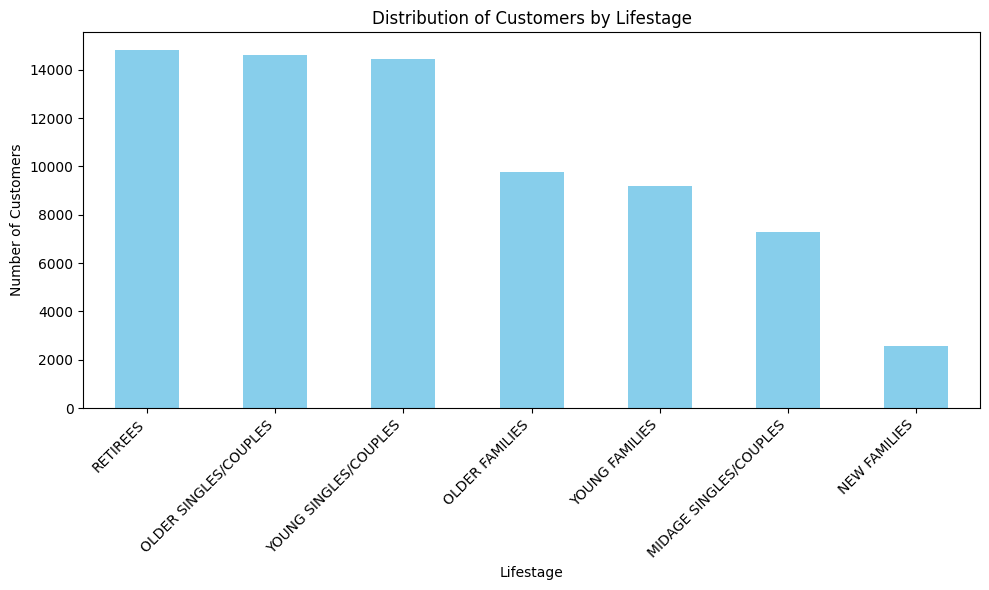

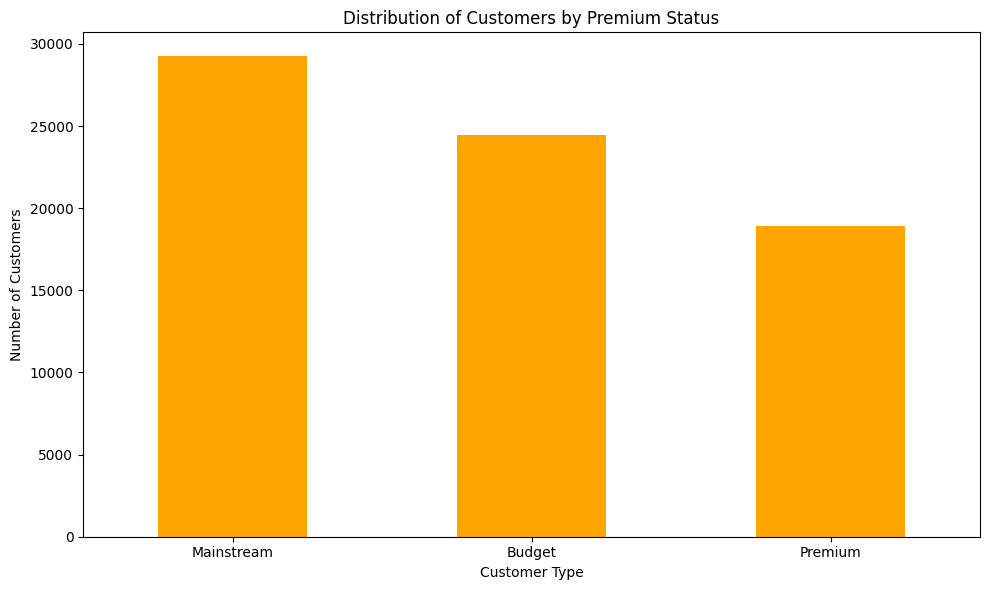

PREMIUM_CUSTOMER        Budget  Mainstream  Premium
LIFESTAGE                                          
MIDAGE SINGLES/COUPLES    1504        3340     2431
NEW FAMILIES              1112         849      588
OLDER FAMILIES            4675        2831     2274
OLDER SINGLES/COUPLES     4929        4930     4750
RETIREES                  4454        6479     3872
YOUNG FAMILIES            4017        2728     2433
YOUNG SINGLES/COUPLES     3779        8088     2574


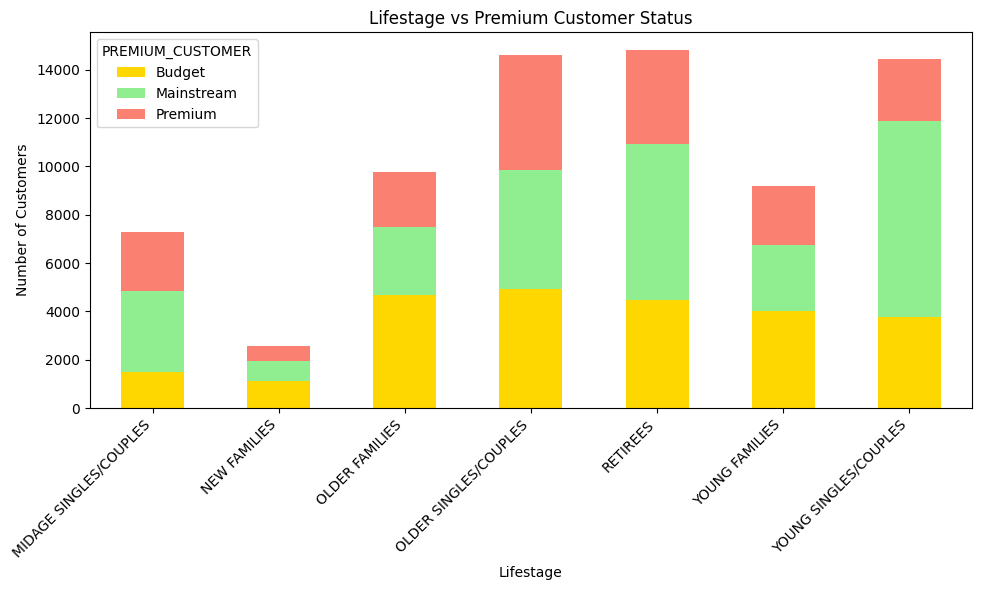

In [91]:
# Distribution of customers by LIFESTAGE
lifestage_counts = data['LIFESTAGE'].value_counts()

fig, ax = plt.subplots(figsize=(10,6))
lifestage_counts.plot(kind='bar', color='skyblue', ax=ax)
ax.set_title('Distribution of Customers by Lifestage')
ax.set_xlabel('Lifestage')
ax.set_ylabel('Number of Customers')
ax.set_xticks(range(len(lifestage_counts.index)))
ax.set_xticklabels(lifestage_counts.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Distribution of customers by PREMIUM_CUSTOMER
premium_counts = data['PREMIUM_CUSTOMER'].value_counts()

fig, ax = plt.subplots(figsize=(10,6))
premium_counts.plot(kind='bar', color='orange', ax=ax)
ax.set_title('Distribution of Customers by Premium Status')
ax.set_xlabel('Customer Type')
ax.set_ylabel('Number of Customers')
ax.set_xticks(range(len(premium_counts.index)))
ax.set_xticklabels(premium_counts.index, rotation=0)
plt.tight_layout()
plt.show()

# Cross-tabulation of LIFESTAGE by PREMIUM_CUSTOMER
crosstab = pd.crosstab(data['LIFESTAGE'], data['PREMIUM_CUSTOMER'])

fig, ax = plt.subplots(figsize=(10,6))
crosstab.plot(kind='bar', stacked=True, color=['gold', 'lightgreen', 'salmon'], ax=ax)
ax.set_title('Lifestage vs Premium Customer Status')
ax.set_xlabel('Lifestage')
ax.set_ylabel('Number of Customers')
ax.set_xticks(range(len(crosstab.index)))
ax.set_xticklabels(crosstab.index, rotation=45, ha='right')
plt.tight_layout()

print(crosstab)

plt.show()


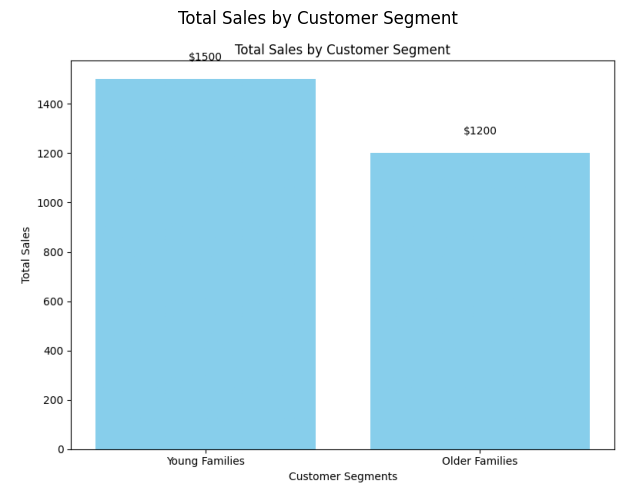

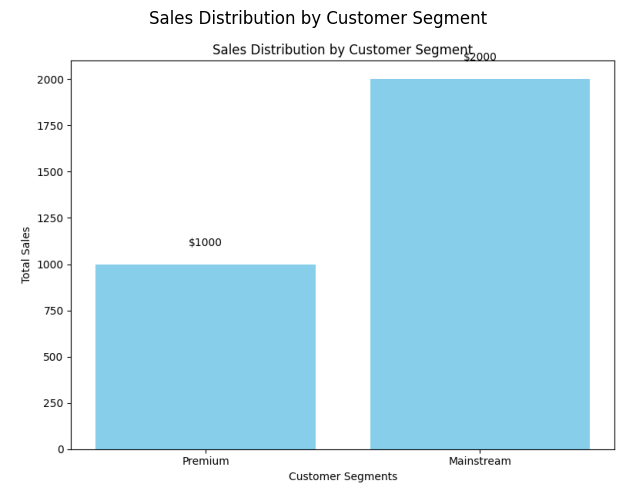

In [92]:
import io

def save_plot(file_name, title, segments, sales):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(segments, sales, color='skyblue')
    ax.set_title(title)
    ax.set_xlabel('Customer Segments')
    ax.set_ylabel('Total Sales')
    # Adding text labels for clarity
    for i, value in enumerate(sales):
        ax.text(i, value + 0.05 * max(sales), f'${value}', ha='center')

    plt.tight_layout()
    plt.savefig(file_name)
    plt.close()

# Define the segments and sales data
segments_sales = {
    'Total Sales by Customer Segment': (['Young Families', 'Older Families'], [1500, 1200]),
    'Sales Distribution by Customer Segment': (['Premium', 'Mainstream'], [1000, 2000])
}

# Create and save plots
for title, (segments, sales) in segments_sales.items():
    save_plot(f'/content/{title.replace(" ", "_").replace(":", "")}.png', title, segments, sales)

# Display the plots
for title in segments_sales.keys():
    img_path = f'/content/{title.replace(" ", "_").replace(":", "")}.png'
    img = plt.imread(img_path)
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(title)
    plt.show()
